In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### importer les fichiers

In [2]:
df=pd.read_csv('../test.csv',header=6)
mtx=pd.read_csv('../mtx.csv',header=6)
inflix=pd.read_csv('../Infliximab.csv',header=6)
toliz=pd.read_csv('../tolizumab.csv',header=6)

In [3]:
df=df.rename(columns={"[run number]": "experNumber", "MacrophageActivation": "MacroAct","FibroblasteActivation":"FibroAct","OsteoclasteActivation":"OsteocAct","ChondrocyteActivation":"ChondroAct","(count patches with [type-patch = \"membraneSynovial\" and pcolor = red] / count patches with [type-patch = \"membraneSynovial\"]) * 100":"MembranDegrad","(1 - ((count patches with [pcolor > 5 and type-patch = \"os\"])/(count patches with [type-patch = \"os\"]))) * 100":"OsDegrad","(1 -((count patches with [type-patch = \"cartilage\"]) / 419)) * 100":"CartilageDegrad","[step]":"step","nb-macrophage":"nbMacrophage","count RANKLs":"countRANKLs","count macrophages":"countMacrophages"})
mtx=mtx.rename(columns={"[run number]": "experNumber", "MacrophageActivation": "MacroAct","FibroblasteActivation":"FibroAct","OsteoclasteActivation":"OsteocAct","ChondrocyteActivation":"ChondroAct","(count patches with [type-patch = \"membraneSynovial\" and pcolor = red] / count patches with [type-patch = \"membraneSynovial\"]) * 100":"MembranDegrad","(1 - ((count patches with [pcolor > 5 and type-patch = \"os\"])/(count patches with [type-patch = \"os\"]))) * 100":"OsDegrad","(1 -((count patches with [type-patch = \"cartilage\"]) / 419)) * 100":"CartilageDegrad","[step]":"step","Dose-MTX":"MtxDose","nb-macrophage":"nbMacrophage","count RANKLs":"countRANKLs","count macrophages":"countMacrophages","count MTXs":"countMTXs","count TNF_as":"countTNF","count IL_6s":"countIL6","count chemokines":"countChemokines","count MMPs":"countMMPs"})
inflix=inflix.rename(columns={"[run number]": "experNumber", "MacrophageActivation": "MacroAct","FibroblasteActivation":"FibroAct","OsteoclasteActivation":"OsteocAct","ChondrocyteActivation":"ChondroAct","(count patches with [type-patch = \"membraneSynovial\" and pcolor = red] / count patches with [type-patch = \"membraneSynovial\"]) * 100":"MembranDegrad","(1 - ((count patches with [pcolor > 5 and type-patch = \"os\"])/(count patches with [type-patch = \"os\"]))) * 100":"OsDegrad","(1 -((count patches with [type-patch = \"cartilage\"]) / 419)) * 100":"CartilageDegrad","[step]":"step","nb-macrophage":"nbMacrophage","count RANKLs":"countRANKLs","count RANKLs":"countRANKLs","count macrophages":"countMacrophages","count Infliximabs":"countInfliximabs","count TNF_as":"countTNF","count IL_6s":"countIL6"})
toliz=toliz.rename(columns={"[run number]": "experNumber", "MacrophageActivation": "MacroAct","FibroblasteActivation":"FibroAct","OsteoclasteActivation":"OsteocAct","ChondrocyteActivation":"ChondroAct","(count patches with [type-patch = \"membraneSynovial\" and pcolor = red] / count patches with [type-patch = \"membraneSynovial\"]) * 100":"MembranDegrad","(1 - ((count patches with [pcolor > 5 and type-patch = \"os\"])/(count patches with [type-patch = \"os\"]))) * 100":"OsDegrad","(1 -((count patches with [type-patch = \"cartilage\"]) / 419)) * 100":"CartilageDegrad","[step]":"step","nb-macrophage":"nbMacrophage","count RANKLs":"countRANKLs","count macrophages":"countMacrophages","count tolizumabs":"countTolizumabs","count chemokines":"countChemokines","count MMPs":"countMMPs","count TNF_as":"countTNF","count IL_6s":"countIL6"})

### Trier les lignes selon l'experience et l'ordre chronologique  

In [4]:
df=df.sort_values(by=['experNumber','step'])
mtx=mtx.sort_values(by=['experNumber','step'])
inflix=inflix.sort_values(by=['experNumber','step'])
toliz=toliz.sort_values(by=['experNumber','step'])



In [5]:
#### exporter les fichiers
# toliz.to_csv('./../tolizxx.csv', index=False)



# 1)  MTX

In [6]:
mtx.describe()

,experNumber,MacroAct,FibroAct,OsteocAct,ChondroAct,nb-fibroblaste,nbMacrophage,nb-osteoclaste,MtxDose,MTX-Act,...,countIL6,countTNF,countMMPs,countMTXs,countMacrophages,countChemokines,countRANKLs,MembranDegrad,OsDegrad,CartilageDegrad
count,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000,729729.0,729729.0,729729.0,729729.00000,729729.000000,...,729729.000000,729729.000000,729729.000000,729729.00000,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000
mean,365.000000,51.666667,51.666667,51.666667,51.666667,668.0,15.0,40.0,5.00000,52.000000,...,6.730615,14.855563,251.502591,5.00000,6.381428,127.326879,185.725039,7.291342,0.010622,0.552346
std,210.444119,37.043543,37.043543,37.043543,37.043543,0.0,0.0,0.0,3.74166,37.478909,...,15.576209,36.781823,937.505866,3.74166,5.046672,321.584510,574.370401,8.370370,0.243284,5.427662
min,1.000000,10.000000,10.000000,10.000000,10.000000,668.0,15.0,40.0,1.00000,10.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.000000,10.000000,10.000000,10.000000,10.000000,668.0,15.0,40.0,1.00000,10.000000,...,1.000000,2.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.000000,45.000000,45.000000,45.000000,45.000000,668.0,15.0,40.0,4.00000,45.000000,...,3.000000,8.000000,13.000000,4.00000,6.000000,42.000000,39.000000,5.089820,0.000000,0.000000
75%,547.000000,100.000000,100.000000,100.000000,100.000000,668.0,15.0,40.0,10.00000,101.000000,...,5.000000,10.000000,185.000000,10.00000,11.000000,97.000000,109.000000,11.077844,0.000000,0.000000
max,729.000000,100.000000,100.000000,100.000000,100.000000,668.0,15.0,40.0,10.00000,101.000000,...,222.000000,631.000000,26661.000000,10.00000,15.000000,5100.000000,13410.000000,39.820359,21.699741,92.362768


In [7]:
mtx['countMMPs']=mtx['countMMPs']/262.101898
mtx['countRANKLs']=mtx['countRANKLs']/185.725039
mtx['countChemokines']=mtx['countChemokines']/127.326879



In [8]:
## cas dose :1 et activation 10 ( experience numero 1) 
exper1=mtx[(mtx.experNumber == 1)]
## cas dose :4 et activation 45 ( experience numero 50) 
exper50=mtx[(mtx.experNumber == 50)]
## cas dose :10 et activation 101 ( experience numero 153) 
exper153=mtx[(mtx.experNumber == 153)]


##Pour les autres cas :

## cas dose :1 et activation 45 ( experience numero 128)
exper128=mtx[(mtx.experNumber == 128)]

## cas dose :1 et activation 101 ( experience numero 138) 
exper138=mtx[(mtx.experNumber == 138)]

## cas dose :4 et activation 10 ( experience numero 247) 
exper247=mtx[(mtx.experNumber == 247)]

## cas dose :4 et activation 101 ( experience numero 537) 
exper537=mtx[(mtx.experNumber == 537)]

## cas dose :10 et activation 10 ( experience numero 133) 
exper133=mtx[(mtx.experNumber == 133)]

## cas dose :10 et activation 45 ( experience numero 350) 
exper350=mtx[(mtx.experNumber == 350)]



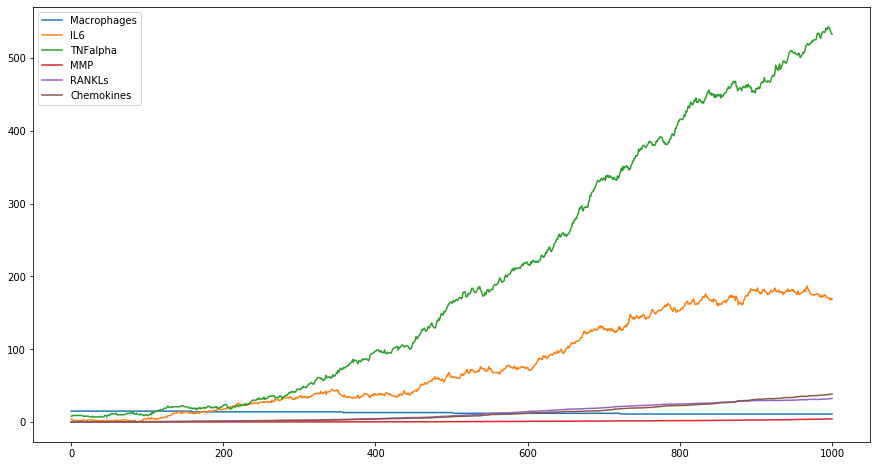

In [9]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.countMacrophages,label="Macrophages")
plt.plot(exper1.step,exper1.countIL6,label="IL6")
plt.plot(exper1.step,exper1.countTNF,label="TNFalpha")
plt.plot(exper1.step,exper1.countMMPs,label="MMP")

plt.plot(exper1.step,exper1.countRANKLs,label="RANKLs")
plt.plot(exper1.step,exper1.countChemokines,label="Chemokines")
plt.legend()



plt.show()

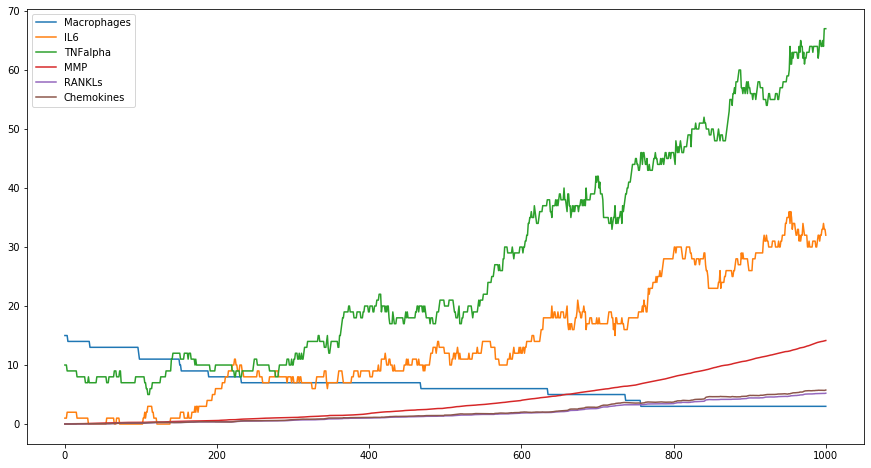

In [10]:
plt.figure(figsize=(15,8))

plt.plot(exper50.step,exper50.countMacrophages,label="Macrophages")
plt.plot(exper50.step,exper50.countIL6,label="IL6")
plt.plot(exper50.step,exper50.countTNF,label="TNFalpha")
plt.plot(exper50.step,exper50.countMMPs,label="MMP")

plt.plot(exper50.step,exper50.countRANKLs,label="RANKLs")
plt.plot(exper50.step,exper50.countChemokines,label="Chemokines")

plt.legend()



plt.show()

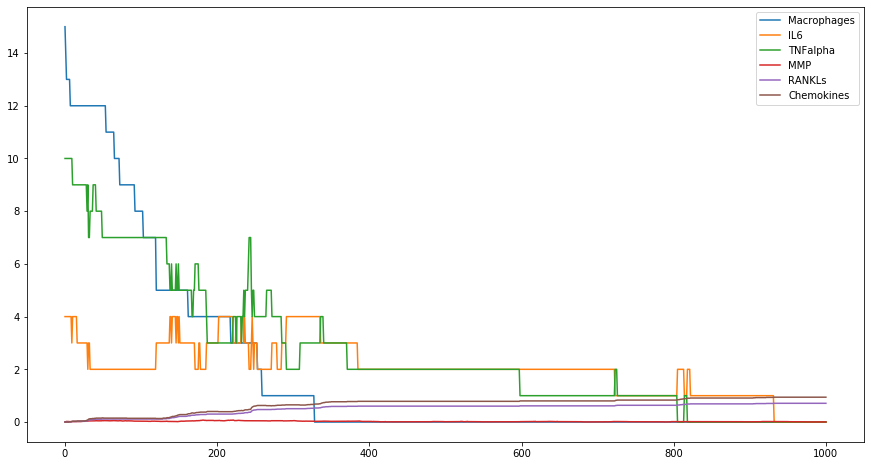

In [11]:
plt.figure(figsize=(15,8))

plt.plot(exper153.step,exper153.countMacrophages,label="Macrophages")
plt.plot(exper153.step,exper153.countIL6,label="IL6")
plt.plot(exper153.step,exper153.countTNF,label="TNFalpha")
plt.plot(exper153.step,exper153.countMMPs,label="MMP")

plt.plot(exper153.step,exper153.countRANKLs,label="RANKLs")
plt.plot(exper153.step,exper153.countChemokines,label="Chemokines")


plt.legend()




plt.show()

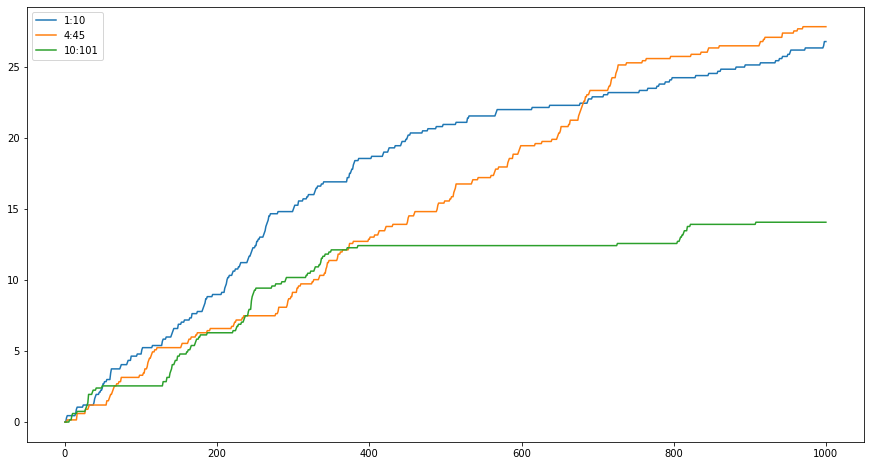

In [12]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.MembranDegrad,label="1:10")
plt.plot(exper50.step,exper50.MembranDegrad,label="4:45")
plt.plot(exper153.step,exper153.MembranDegrad,label="10:101")


plt.legend()


plt.show()

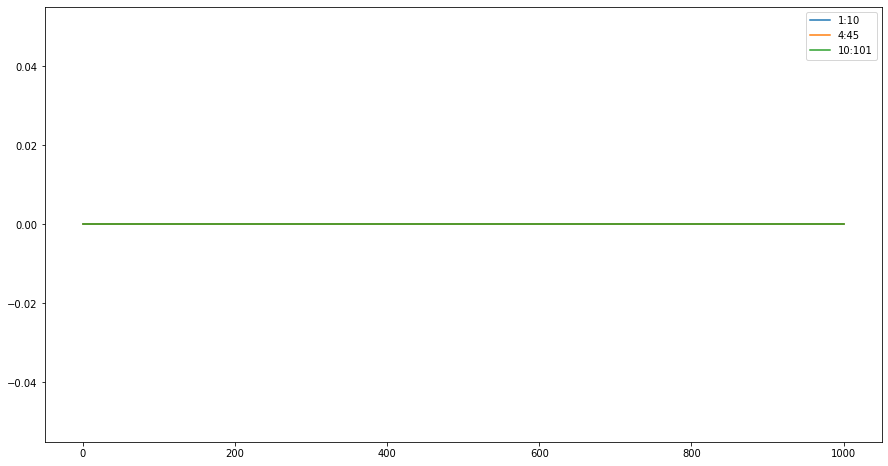

In [13]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.OsDegrad,label="1:10")
plt.plot(exper50.step,exper50.OsDegrad,label="4:45")
plt.plot(exper153.step,exper153.OsDegrad,label="10:101")


plt.legend()


plt.show()

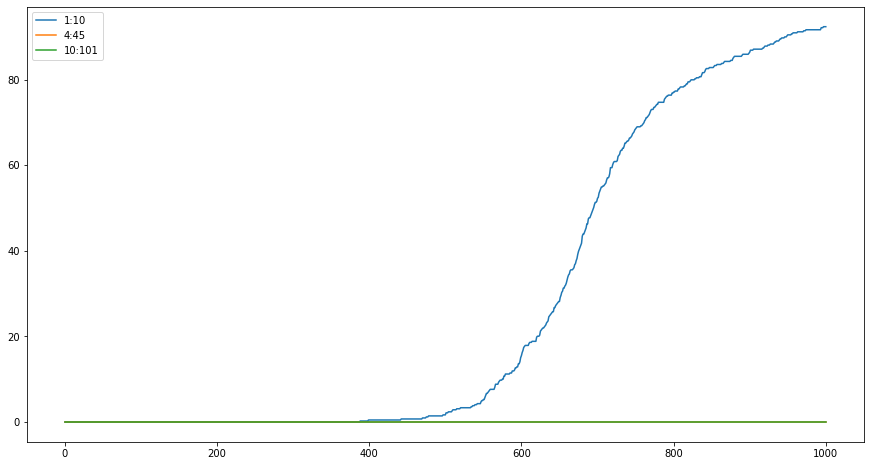

In [14]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.CartilageDegrad,label="1:10")
plt.plot(exper50.step,exper50.CartilageDegrad,label="4:45")
plt.plot(exper153.step,exper153.CartilageDegrad,label="10:101")


plt.legend()


plt.show()

#  2) Infliximab

In [15]:
inflix.describe()

,experNumber,MacroAct,FibroAct,OsteocAct,ChondroAct,nb-fibroblaste,nbMacrophage,nb-osteoclaste,Dose-Infliximab,Infliximab-Act,...,countIL6,countTNF,count MMPs,countInfliximabs,countMacrophages,count chemokines,countRANKLs,MembranDegrad,OsDegrad,CartilageDegrad
count,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000,729729.0,729729.0,729729.0,729729.000000,729729.000000,...,729729.000000,729729.000000,729729.000000,729729.000000,729729.0,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000
mean,365.000000,51.666667,51.666667,51.666667,51.666667,668.0,15.0,40.0,100.000000,51.666667,...,8.567326,16.500823,227.436425,94.638503,15.0,111.131283,204.207729,5.019391,0.040300,1.134914
std,210.444119,37.043543,37.043543,37.043543,37.043543,0.0,0.0,0.0,81.244543,37.043543,...,24.393216,60.459782,1133.263460,79.190645,0.0,405.367623,816.117154,7.644423,0.966833,8.647776
min,1.000000,10.000000,10.000000,10.000000,10.000000,668.0,15.0,40.0,1.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,15.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.000000,10.000000,10.000000,10.000000,10.000000,668.0,15.0,40.0,1.000000,10.000000,...,1.000000,0.000000,1.000000,1.000000,15.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.000000,45.000000,45.000000,45.000000,45.000000,668.0,15.0,40.0,99.000000,45.000000,...,2.000000,0.000000,7.000000,95.000000,15.0,10.000000,13.000000,1.946108,0.000000,0.000000
75%,547.000000,100.000000,100.000000,100.000000,100.000000,668.0,15.0,40.0,200.000000,100.000000,...,4.000000,6.000000,92.000000,190.000000,15.0,37.000000,49.000000,6.137725,0.000000,0.000000
max,729.000000,100.000000,100.000000,100.000000,100.000000,668.0,15.0,40.0,200.000000,100.000000,...,262.000000,708.000000,23940.000000,200.000000,15.0,6141.000000,17754.000000,37.724551,59.534081,98.329356


In [16]:
## cas dose :1 et activation 10 ( experience numero 1) 
exper1=inflix[(inflix.experNumber == 1)]

## cas dose :99 et activation 45 ( experience numero 140) 
exper140=inflix[(inflix.experNumber == 140)]

## cas dose :200 et activation 100 ( experience numero 45) 
exper45=inflix[(inflix.experNumber == 45)]

##Pour les autres cas :

## cas dose :1 et activation 45 ( experience numero 47) 
exper47=inflix[(inflix.experNumber == 47)]
## cas dose :1 et activation 100 ( experience numero 210) 
exper210=inflix[(inflix.experNumber == 210)]
## cas dose :99 et activation 10 ( experience numero 140) 
exper140=inflix[(inflix.experNumber == 140)]
## cas dose :99 et activation 100 ( experience numero 231) 
exper231=inflix[(inflix.experNumber == 231)]
## cas dose :200 et activation 10 ( experience numero 106) 
exper106=inflix[(inflix.experNumber == 106)]
## cas dose :200 et activation 45 ( experience numero 35) 
exper35=inflix[(inflix.experNumber == 35)]

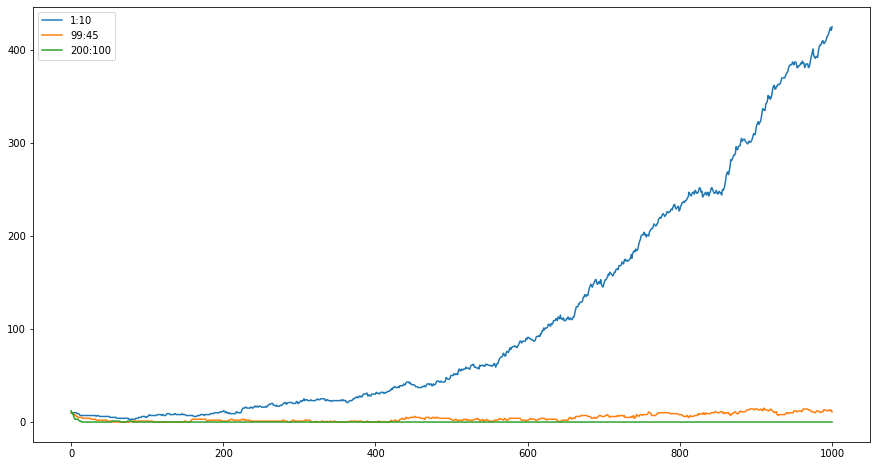

In [17]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.countTNF,label="1:10")
plt.plot(exper140.step,exper140.countTNF,label="99:45")
plt.plot(exper45.step,exper45.countTNF,label="200:100")

plt.legend()



plt.show()

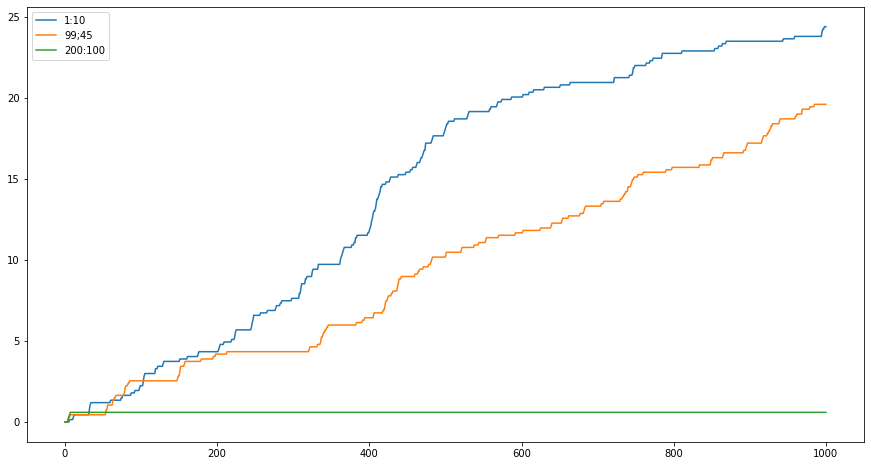

In [18]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.MembranDegrad,label="1:10")
plt.plot(exper140.step,exper140.MembranDegrad,label="99;45")
plt.plot(exper45.step,exper45.MembranDegrad,label="200:100")


plt.legend()


plt.show()

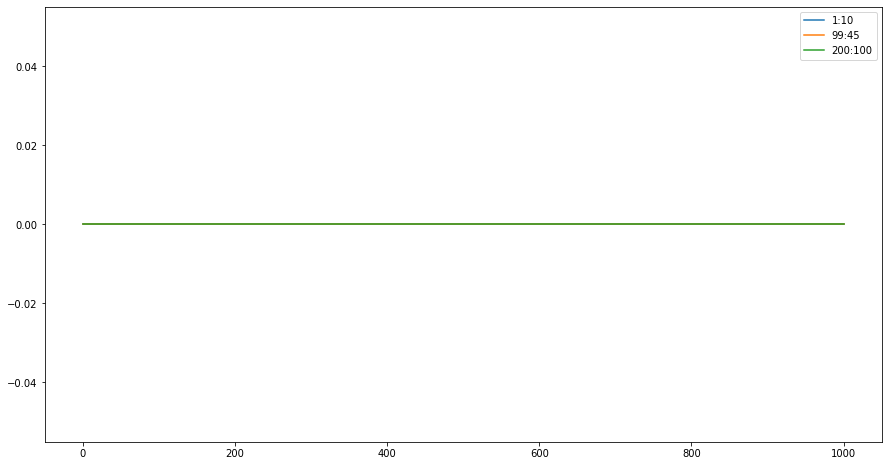

In [19]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.OsDegrad,label="1:10")
plt.plot(exper140.step,exper140.OsDegrad,label="99:45")
plt.plot(exper45.step,exper45.OsDegrad,label="200:100")


plt.legend()


plt.show()

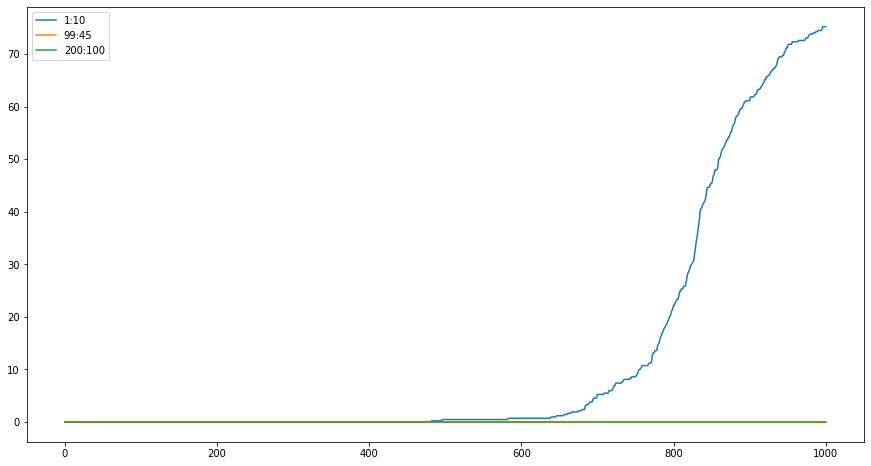

In [20]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.CartilageDegrad,label="1:10")
plt.plot(exper140.step,exper140.CartilageDegrad,label="99:45")
plt.plot(exper45.step,exper45.CartilageDegrad,label="200:100")


plt.legend()


plt.show()

# 3) Tolizumab :

In [21]:
toliz.describe()

,experNumber,MacroAct,FibroAct,OsteocAct,ChondroAct,nb-fibroblaste,nbMacrophage,nb-osteoclaste,Dose-tolizumab,Tolizumab-Act,...,countIL6,countTNF,countMMPs,countTolizumabs,countMacrophages,countChemokines,countRANKLs,MembranDegrad,OsDegrad,CartilageDegrad
count,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000,729729.0,729729.0,729729.0,729729.000000,729729.000000,...,729729.000000,729729.000000,729729.000000,729729.000000,729729.0,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000
mean,365.000000,51.666667,51.666667,51.666667,51.666667,668.0,15.0,40.0,50.000000,51.666667,...,6.296669,14.669317,182.966878,2.037432,15.0,92.881526,168.087949,4.456767,0.025329,1.059064
std,210.444119,37.043543,37.043543,37.043543,37.043543,0.0,0.0,0.0,40.422794,37.043543,...,22.934294,55.723161,1111.927548,9.006270,0.0,386.925255,773.735704,6.957963,0.586070,8.304312
min,1.000000,10.000000,10.000000,10.000000,10.000000,668.0,15.0,40.0,1.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,15.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.000000,10.000000,10.000000,10.000000,10.000000,668.0,15.0,40.0,1.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,15.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.000000,45.000000,45.000000,45.000000,45.000000,668.0,15.0,40.0,49.000000,45.000000,...,0.000000,0.000000,4.000000,0.000000,15.0,0.000000,0.000000,2.095808,0.000000,0.000000
75%,547.000000,100.000000,100.000000,100.000000,100.000000,668.0,15.0,40.0,100.000000,100.000000,...,2.000000,6.000000,52.000000,0.000000,15.0,13.000000,16.000000,4.940120,0.000000,0.000000
max,729.000000,100.000000,100.000000,100.000000,100.000000,668.0,15.0,40.0,100.000000,100.000000,...,250.000000,711.000000,31191.000000,100.000000,15.0,5146.000000,14314.000000,36.676647,39.603106,95.465394


In [22]:
## cas dose :1 et activation 10 ( experience numero 1) 
exper1=toliz[(toliz.experNumber == 1)]
## cas dose :49 et activation 45 ( experience numero 23) 
exper23=toliz[(toliz.experNumber == 23)]
## cas dose :100 et activation 100 ( experience numero 243) 
exper243=toliz[(toliz.experNumber == 243)]


##Pour les autres cas :

## cas dose :1 et activation 45 ( experience numero 101) 
exper101=toliz[(toliz.experNumber == 101)]
## cas dose :1 et activation 100 ( experience numero 57) 
exper57=toliz[(toliz.experNumber == 57)]
## cas dose :49 et activation 10 ( experience numero 40) 
exper40=toliz[(toliz.experNumber == 40)]
## cas dose :49 et activation 100 ( experience numero 294) 
exper294=toliz[(toliz.experNumber == 294)]
## cas dose :100 et activation 10 ( experience numero 16) 
exper16=toliz[(toliz.experNumber == 16)]
## cas dose :100 et activation 45 ( experience numero 179) 
exper179=toliz[(toliz.experNumber == 179)]



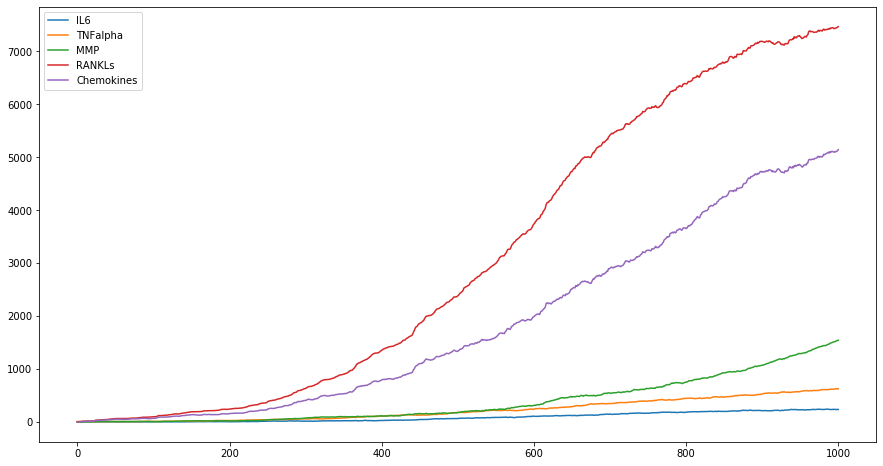

In [23]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.countIL6,label="IL6")
plt.plot(exper1.step,exper1.countTNF,label="TNFalpha")
plt.plot(exper1.step,exper1.countMMPs,label="MMP")

plt.plot(exper1.step,exper1.countRANKLs,label="RANKLs")
plt.plot(exper1.step,exper1.countChemokines,label="Chemokines")
plt.legend()



plt.show()

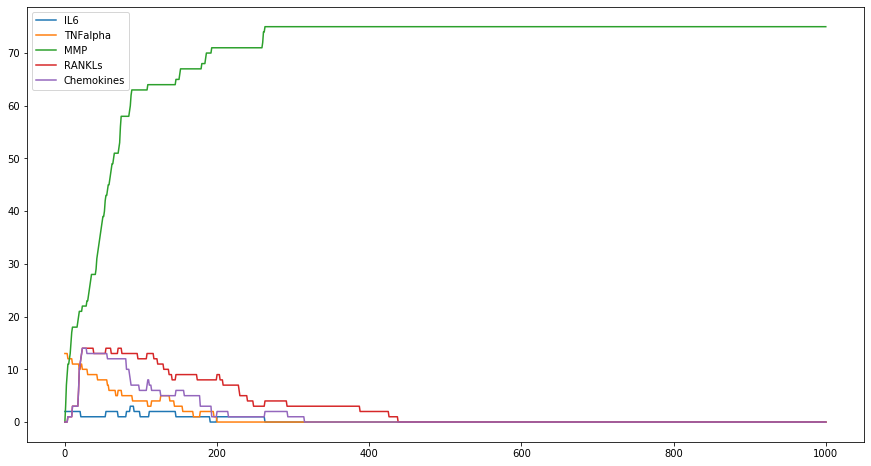

In [24]:
plt.figure(figsize=(15,8))

plt.plot(exper23.step,exper23.countIL6,label="IL6")
plt.plot(exper23.step,exper23.countTNF,label="TNFalpha")
plt.plot(exper23.step,exper23.countMMPs,label="MMP")

plt.plot(exper23.step,exper23.countRANKLs,label="RANKLs")
plt.plot(exper23.step,exper23.countChemokines,label="Chemokines")
plt.legend()



plt.show()

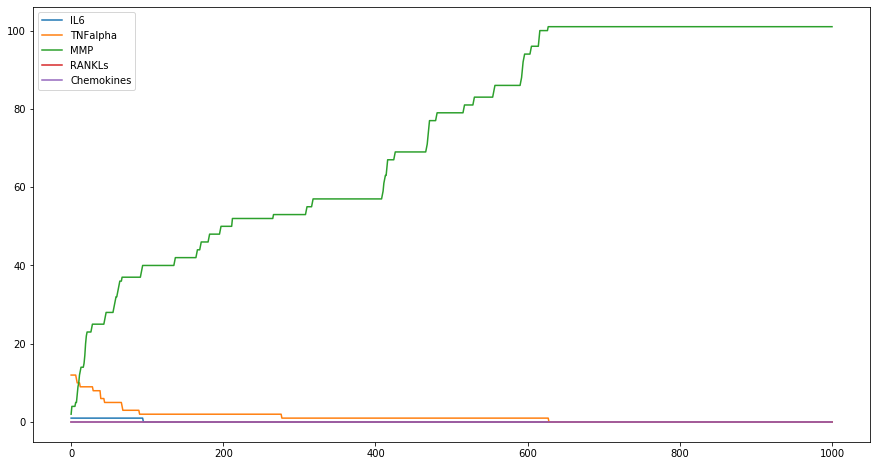

In [25]:
plt.figure(figsize=(15,8))

plt.plot(exper243.step,exper243.countIL6,label="IL6")
plt.plot(exper243.step,exper243.countTNF,label="TNFalpha")
plt.plot(exper243.step,exper243.countMMPs,label="MMP")

plt.plot(exper243.step,exper243.countRANKLs,label="RANKLs")
plt.plot(exper243.step,exper243.countChemokines,label="Chemokines")
plt.legend()



plt.show()

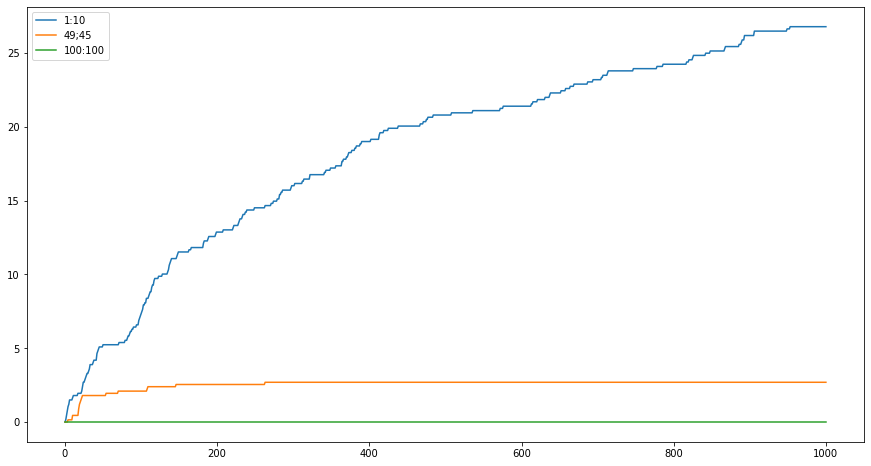

In [26]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.MembranDegrad,label="1:10")
plt.plot(exper23.step,exper23.MembranDegrad,label="49;45")
plt.plot(exper243.step,exper243.MembranDegrad,label="100:100")


plt.legend()


plt.show()

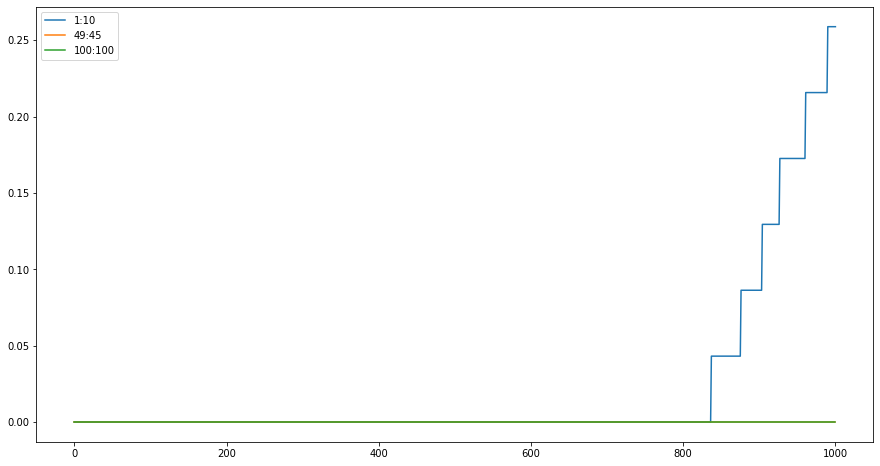

In [27]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.OsDegrad,label="1:10")
plt.plot(exper23.step,exper23.OsDegrad,label="49:45")
plt.plot(exper243.step,exper243.OsDegrad,label="100:100")


plt.legend()


plt.show()

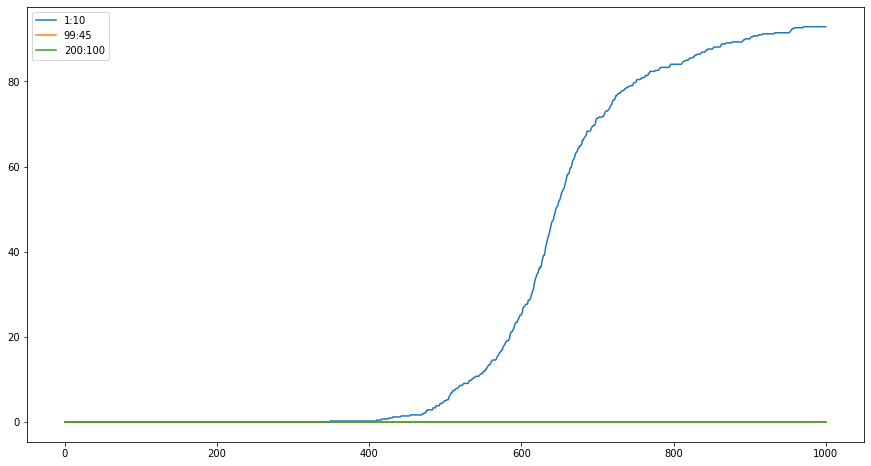

In [28]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.CartilageDegrad,label="1:10")
plt.plot(exper23.step,exper23.CartilageDegrad,label="99:45")
plt.plot(exper243.step,exper243.CartilageDegrad,label="200:100")


plt.legend()


plt.show()